# Project: Investigate Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have selected a data set of about 10,000 movies collected from a movie database (TMDb) that includes user ratings, budgets, cast members, and revenues. There are many questions that I can ask about the data set. Do bigger budgets generate more revenue? What is difference in popularity between decades? What about the difference in revenues between decades? I can answer these questions and more by cleaning, assessing and appending the data set. From there, I will be able to present my findings.

<a id='wrangling'></a>
## Data Wrangling

### General Properties

The first thing to do is to look at the dataset that we are planning to investigate and ask questions about.

In [41]:
# Import data and statements for all of the packages that I'm using.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

movie_df = pd.read_csv('tmdb-movies.csv')

In [42]:
# Print out first line of dtat and inspect. I will look for instances of missing or possibly errant data.

print(movie_df.shape)
movie_df.head(1)

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


Now find the basic information associated with the dataset.

In [43]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

So now we can see that there are 10866 entries and 21 columns. There are some null values that exist in the cast, director, overview and genres columns. Some columns have a lot of null values like homepage, tagline, keywords and production companies. I can drop some of these columns because they aren't relevant to the questions that I'm asking.

In [44]:
# Now I can see the null values more clearly.

movie_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [45]:
# Here I can see the descriptive statistics.

movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


By looking at these statistics from the dataset, we can see that there are alot of zero's in the budget and revenue columns. The could be from missing data or just small values. I need to look at the zero's more closely to see what is going on with those columns.

In [46]:
# Find the zero budget data

movie_df_budget_zero = movie_df.query('budget == 0')
movie_df_budget_zero.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/15,425,6.4,2015,0.0,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/15,474,6.2,2015,0.0,2.056620e+07
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/15,81,5.5,2015,0.0,4.222338e+04


In [47]:
# Find the zero revenue data

movie_df_revenue_zero = movie_df.query('revenue == 0')
movie_df_revenue_zero.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/15,481,5.3,2015,2.759999e+07,0.0
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/15,280,5.4,2015,1.839999e+07,0.0
74,347096,tt3478232,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,http://www.mythicamovie.com/#!blank/wufvh,Anne K. Black,NaN,...,When Teelaâ€™s sister is murdered and a powerf...,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,6/24/15,27,5.1,2015,0.000000e+00,0.0


These values are important to my questions so I decide to change the zero values to null values for both budget and revenue.

### Data Cleaning

To clean the data from my movie dataset, I need to drop unnecessary columns that aren't applicable to my questions. These columns would be homepage, tagline, imdb_id, director, cast, runtime, overview, budget_adj, and revenue_adj. I also need to drop duplicates and replace zero values with null values in the budget and revenue columns.

In [48]:
# Drop unneccessary columns.

col = ['imdb_id', 'homepage', 'tagline', 'director', 'cast', 'runtime', 'overview', 'budget_adj', 'revenue_adj']
movie_df.drop(col, axis=1, inplace=True)

In [49]:
# Make sure the columns are dropped.

movie_df.head()

,id,popularity,budget,revenue,original_title,keywords,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,android|spaceship|jedi|space opera|3d,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,car race|speed|revenge|suspense|car,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [50]:
# Drop duplicates

movie_df.drop_duplicates(inplace=True)

In [51]:
# Replace zero values with null values in the budget and revenue columns.

movie_df['budget'] = movie_df['budget'].replace(0, np.NaN)
movie_df['revenue'] = movie_df['revenue'].replace(0, np.NaN)
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
id                      10865 non-null int64
popularity              10865 non-null float64
budget                  5169 non-null float64
revenue                 4849 non-null float64
original_title          10865 non-null object
keywords                9372 non-null object
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
dtypes: float64(4), int64(3), object(5)
memory usage: 1.1+ MB


Now I need to create a new column titled "Decade" so that I can plot the popularity over decades rather than each individual year.

In [52]:
# Bin edges to cut data into groups for each decade.

bin_edges = [1950,1960,1970,1980,1990,2000,2010,2015]

bin_names = ['1960','1970','1980','1990','2000','2010','2015' ]

movie_df['decade'] = pd.cut(movie_df['release_year'], bin_edges, labels=bin_names)

In [53]:
# Convert the decade type to numeric.

movie_df['decade'] = pd.to_numeric(movie_df['decade'])

In [54]:
# Make sure decade is now a column.

movie_df.head()

,id,popularity,budget,revenue,original_title,keywords,genres,production_companies,release_date,vote_count,vote_average,release_year,decade
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,android|spaceship|jedi|space opera|3d,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,car race|speed|revenge|suspense|car,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,2015


In [55]:
movie_df.describe()

,id,popularity,budget,revenue,vote_count,vote_average,release_year,decade
count,10865.000000,10865.000000,5.169000e+03,4.849000e+03,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,3.073958e+07,8.923886e+07,217.399632,5.975012,2001.321859,2004.647952
std,92134.091971,1.000231,3.890441e+07,1.620801e+08,575.644627,0.935138,12.813260,11.996787
min,5.000000,0.000065,1.000000e+00,2.000000e+00,10.000000,1.500000,1960.000000,1960.000000
25%,10596.000000,0.207575,6.000000e+06,7.732325e+06,17.000000,5.400000,1995.000000,2000.000000
50%,20662.000000,0.383831,1.700000e+07,3.185308e+07,38.000000,6.000000,2006.000000,2010.000000
75%,75612.000000,0.713857,4.000000e+07,9.996575e+07,146.000000,6.600000,2011.000000,2015.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,9767.000000,9.200000,2015.000000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: Do bigger budgets generate move revenue?

Now that I've cleaned the data, I can answer this question about budgets and generated revenue.

In [56]:
# Look at dataset

movie_df.head(2)

,id,popularity,budget,revenue,original_title,keywords,genres,production_companies,release_date,vote_count,vote_average,release_year,decade
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,2015


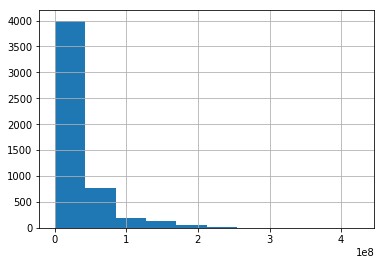

In [57]:
# Run a histogram for the budget of the movies.

movie_df.budget.hist()

In this histogram, you can see that most of the movies have a smaller budgets.

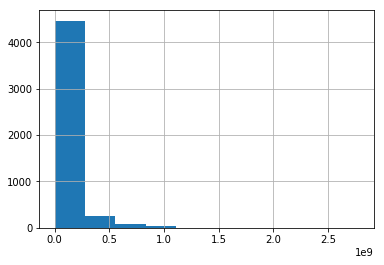

In [58]:
# Run a histogram for the revenue of the movies.

movie_df.revenue.hist()

In this histogram, you can see that even more of the movies have a smaller revenues.

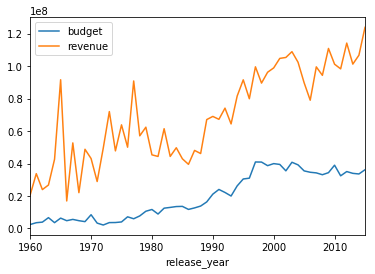

In [59]:
# Create a line chart to visually see the comparison between budget and revenue over the years.

movie_df.groupby('release_year')['budget','revenue'].mean().plot(kind='line',alpha=5,secondary_y='runtime');

This line chart compares the averages of both variables throughout the years. We can see that both revenues and budgets have increased over the years. We can also see that the revenue averages are more volatile than the budget averages.

Now I need to look at the specific movies that have the highest budgets and compare them to the movies with the highest revenues.

In [60]:
# Run for highest budget movies.

p_max = movie_df.groupby('budget').max()
p_max.tail()

,id,popularity,revenue,original_title,release_date,vote_count,vote_average,release_year,decade
budget,,,,,,,,,
270000000.0,1452,1.957331,3.910812e+08,Superman Returns,6/28/06,834,5.3,2006,2010
280000000.0,99861,5.944927,1.405036e+09,Avengers: Age of Ultron,4/22/15,4304,7.4,2015,2015
300000000.0,285,4.965391,9.610000e+08,Pirates of the Caribbean: At World's End,5/19/07,2626,6.8,2007,2010
380000000.0,1865,4.955130,1.021683e+09,Pirates of the Caribbean: On Stranger Tides,5/11/11,3180,6.3,2011,2015
425000000.0,46528,0.250540,1.108757e+07,The Warrior's Way,12/2/10,74,6.4,2010,2010


In [61]:
# Run for highest revenue movies.

p_max = movie_df.groupby('revenue').max()
p_max.tail()

,id,popularity,budget,original_title,genres,release_date,vote_count,vote_average,release_year,decade
revenue,,,,,,,,,,
1.513529e+09,135397,32.985763,150000000.0,Jurassic World,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,2015
1.519558e+09,24428,7.637767,220000000.0,The Avengers,Science Fiction|Action|Adventure,4/25/12,8903,7.3,2012,2015
1.845034e+09,597,4.355219,200000000.0,Titanic,Drama|Romance|Thriller,11/18/97,4654,7.3,1997,2000
2.068178e+09,140607,11.173104,200000000.0,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,2015
2.781506e+09,19995,9.432768,237000000.0,Avatar,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2010


Text(0,0.5,'Revenue')

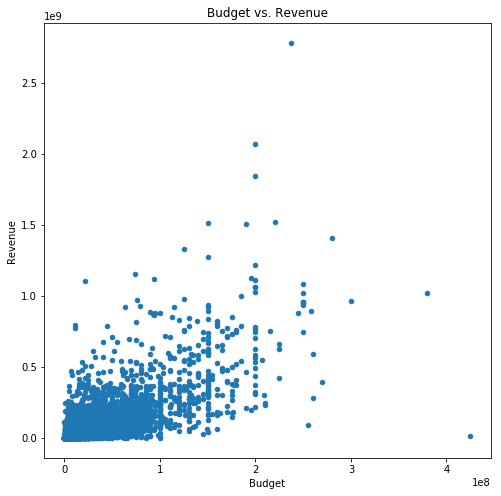

In [62]:
# Create a scatter plot showing the correlation between budget and revenue.

movie_df.plot(x='budget',y='revenue',kind='scatter',figsize=(8,8));
plt.title('Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')

It looks like there is a positive correlation between revenue and budget with a couple outliers present. Most of the movies gather in the bottom left-hand corner which suggests that the budget and revenues aren't that much different. However, you can see that there are a couple movies on the outskirts which suggest that some movies had a very high budget but almost no revenue. The opposite is also true for other movies where their budget was small but the revenue was high.

### Question 2: Which decade has the highest popularity?

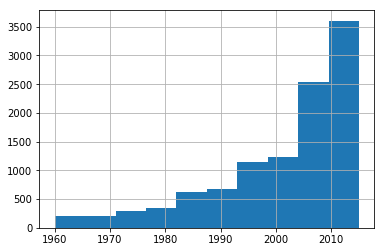

In [63]:
# Run a histogram to see how many movies have been released throughout the years.

movie_df.release_year.hist()

In this histogram, you can see the amount of movies that have been released from 1960 to 2015.

In [64]:
# Compute the mean for the popularity of each decade.

popularity_year=movie_df.groupby('decade')['popularity'].mean()
popularity_year

decade
1960    0.458932
1970    0.412130
1980    0.496937
1990    0.527672
2000    0.617926
2010    0.638576
2015    0.771677
Name: popularity, dtype: float64

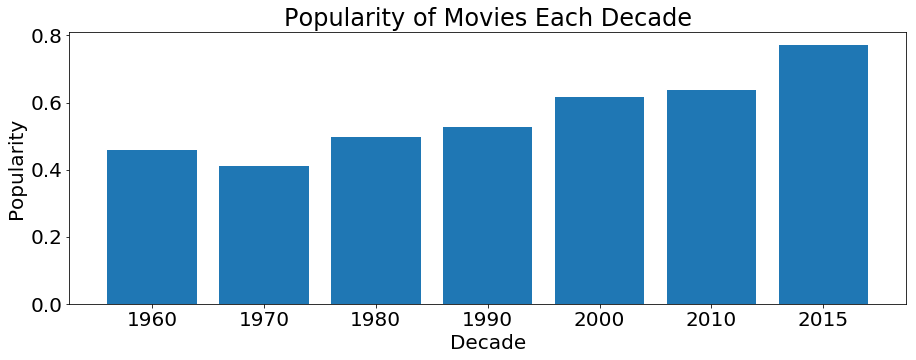

In [69]:
# Create a bar chart comparing the popularity of movies each decade.

locations=[i for i in range(popularity_year.count())]
labels= popularity_year.keys()
height=popularity_year.values
plt.bar(locations, height, tick_label=labels)
plt.title ("Popularity of Movies Each Decade")
plt.xlabel ('Decade')
plt.ylabel ('Popularity')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=15
fig_size[1]=5
plt.rcParams["figure.figsize"]=fig_size
plt.rcParams.update({'font.size': 20})

From this bar chart, we can see that popularity of movies has increased throughout the years with the exception of the 1970's. Also, the difference between 2010 and 2015 is greater than previous decades most likely due the amount of movies released in that decade.

### Question 3: Which decade has the highest revenue?

In [66]:
# Compute the mean for the revenue for each decade.

revenue_year=movie_df.groupby('decade')['revenue'].mean()
revenue_year

decade
1960    2.071500e+07
1970    3.899150e+07
1980    5.762797e+07
1990    5.155339e+07
2000    8.538361e+07
2010    9.885315e+07
2015    1.084378e+08
Name: revenue, dtype: float64

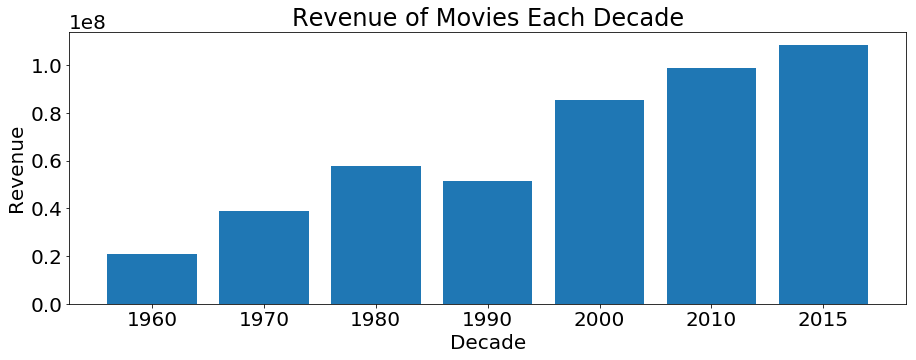

In [67]:
# Create a bar chart comparing the revenues of movies each decade.

locations=[i for i in range(revenue_year.count())]
labels= revenue_year.keys()
height=revenue_year.values
plt.bar(locations, height, tick_label=labels)
plt.title ("Revenue of Movies Each Decade")
plt.xlabel ('Decade')
plt.ylabel ('Revenue')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0]=15
fig_size[1]=5
plt.rcParams["figure.figsize"]=fig_size
plt.rcParams.update({'font.size': 20})

From this bar chart, we can see that revenue of movies has increased throughout the years with the exception of the 1990's.

<a id='conclusions'></a>
## Conclusions

Based on my findings, we can conclude that there is a positive correlation between budgets and revenues. However, it's not a perfect correlation because there are some outliers. This means that there are some movies that had big budgets but a low revenue and some movies with small budgets that had big revenues. The outliers are mostly high budget movies with lower revenues. I also reseached some of the movies to confirm their budgets and revenues. 

We also were able to see the difference in popularity of movies between decades. With no surprise, popularity rose each decade with the exception of the 1970's, which decreased a little bit. However, we do not know how popularity is calculated and what factors are involved. Also, there are more and more movies produced each decade, which could affect the popularity measure. We also saw the revenues produced from movies each decade. We can see that each decade the amount increased with the exception of the 1990's. It's possible that less movies were produced during those years which led to a lower overall revenue or the movies just weren't as "popular".

There are many questions that could be asked about this data set, but there are various limitations and assumptions involved as well.

I referred to Udacity lessons, GitHub, and Stack Overflow for help to complete my anaylsis of this dataset.

In [70]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0